### CA

The code will overlay various cellular automata over simple 3d geometries (2 sphere, torus, cube, etc.) & time evolve system to see how these projections affect simple well known CA.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib import cm

#this can be ineff. because only need to be done once.

def makeGraph(dim, top):
    #plus one for now, see if we need to come back to this
    graph = np.zeros((dim, dim))
    i = 0
    while i < len(graph):
        j = 0
        while j < len(graph):
            graph[i][j] = top*random.random()
            j+=1
        i+=1
    return(graph)

#sgr = geometric graph
#gr = ~random graph
def layOver(gr,sgr):
    return(graph)

#this will work for adjacent members only, with no pbc's
def updateGraph(graph, rule):
    #loop
    tempgraph = graph.copy()
    outgraph = graph.copy()
    #print(hex(id(tempgraph)))
    #print(hex(id(graph)))
    #print(hex(id(outgraph)))
    i = 0
    while i < len(graph):
        j = 0
        while j < len(graph):
            #Rule 1
            #If neighbor to the left is larger, swap values
            if rule == 1:
                try:
                    if tempgraph[i][j-1] > tempgraph[i][j]:
                        #print('got here')
                        outgraph[i][j] = tempgraph[i][j-1]
                except:
                    pass
            if rule == 2:
                #distance for averageing
                n=2
                try:
                    outgraph[i][j] = (tempgraph[i+n][j] + tempgraph[i][j+n] + tempgraph[i-n][j] + tempgraph[i][j-n])/2
                #lazy workaround until i want to do pbcs, just set up equiv class w/ ~ = int\{dim(G)} 
                # really waiting on this to decide if i want to implement outside of specific rules for code clarity
                except:
                    pass
            j+=1
        i+=1
            
    #print(hex(id(tempgraph)))
    #print(hex(id(graph)))
    #print(hex(id(outgraph)))
    return(outgraph)

def makeShape(shape, dim):
    if str(shape) == 'sphere':
        graph = np.zeros((dim, dim))
        print('got here')
        i=0
        while i < len(graph):
            j = 0
            while j < len(graph):
                ycen = i - dim/2
                xcen = j - dim/2
                currRad = pow(xcen*xcen+ycen*ycen, .5)
                if currRad < (dim/2) - 1:
                    #print(i, j)

                    graph[i][j] = round(pow((dim*dim/4.0 - xcen*xcen - ycen*ycen), .5))
                j+=1
            i+=1
        return(graph)
    else:
        return()



got here


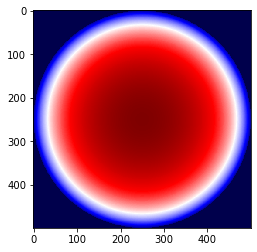

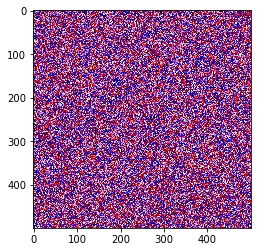

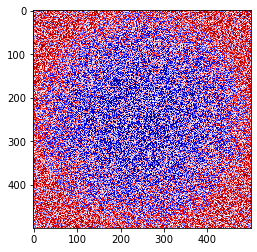

In [2]:
dimset=500

arr = makeShape('sphere', dimset)
#print(arr)

forPlot = [[],[],[]]
i=0
while i < len(arr):
    j=0
    while j < len(arr):
        forPlot[0].append(i)
        forPlot[1].append(j)
        forPlot[2].append(arr[i][j])
        j+=1
    i+=1
#seismic
cmapp='seismic'
#print(forPlot)
plt.figure(1)
plt.imshow(arr, cmap=cmapp, interpolation='nearest')
plt.savefig('otherpic.pdf')

plt.figure(2)
arr2=makeGraph(dimset, dimset/2)
plt.imshow(arr2, cmap=cmapp, interpolation='nearest')
plt.savefig('otherotherpic.pdf')


arrnew = arr2-arr/2

plt.figure(3)
plt.imshow(arrnew, cmap=cmapp, interpolation='nearest')
plt.savefig('pic.pdf')

got here


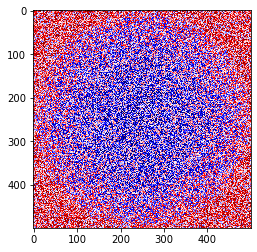

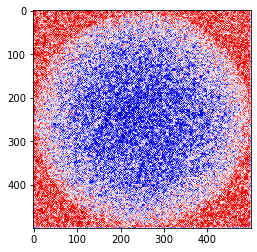

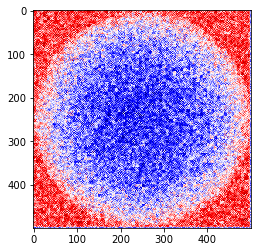

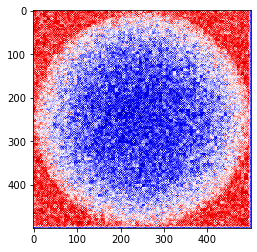

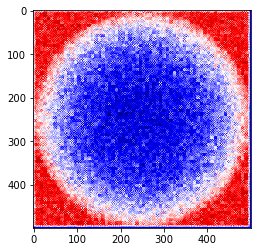

In [3]:
dimset=500
graph1max = dimset
graph1 = makeGraph(dimset, graph1max)
arr = makeShape('sphere', dimset)
graph1 = graph1-arr

rule = 2
#need to of course add updating function/pbcs, just doing this to check that it is working for a given iteration
graph2 = updateGraph(graph1, rule)
graph3 = updateGraph(graph2,rule)
graph4 = updateGraph(graph3,rule)
graph5 = updateGraph(graph4,rule)
graph6 = updateGraph(graph5,rule)
graph7 = updateGraph(graph6,rule)
graph8 = updateGraph(graph7,rule)
graph9 = updateGraph(graph8,rule)

plt.figure(1)
plt.imshow(graph1, cmap=cmapp, interpolation='nearest')
#plt.clim(-dimset,graph1max)
plt.figure(2)
plt.imshow(graph2, cmap=cmapp, interpolation='nearest')
#plt.clim(-dimset,graph1max)
plt.figure(3)
plt.imshow(graph3, cmap=cmapp, interpolation='nearest')
#plt.clim(-dimset,graph1max)
plt.figure(4)
plt.imshow(graph4, cmap=cmapp, interpolation='nearest')
#plt.clim(-dimset,graph1max)
plt.figure(5)
plt.imshow(graph9, cmap=cmapp, interpolation='nearest')
#plt.clim(-dimset,graph1max)

[[2, 1], [2, 3], [3, 4]] [[1, 2], [2, 3], [3, 4]]
